Importing dependencies and data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./gapminder.csv", sep=";")

Formatting data set visualization

In [20]:
plt.style.use("ggplot")

pd.set_option('display.precision', 2)

df.columns = df.columns.str.capitalize()
df = df.rename(columns={
  "Lifeexp":"Life expectancy",
  "Pop":"Population total",
  "Gdppercap": "GDP per capta"
  })

df = df.dropna()

In [21]:
# All columns
df.columns

Index(['Country', 'Continent', 'Year', 'Life expectancy', 'Population total',
       'GDP per capta'],
      dtype='object')

<h3> Analysis per continent </h3>

In [22]:
# All unique continents
df["Continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [23]:
# Setting variables
years = df["Year"].unique()

colors_dictionary = {
  "Asia" : "Purple",
  "Europe" : "Red",
  "Africa" : "Black",
  "Americas" : "Green",
  "Oceania" : "Blue"
}


<h4> Countries per continent </h4>

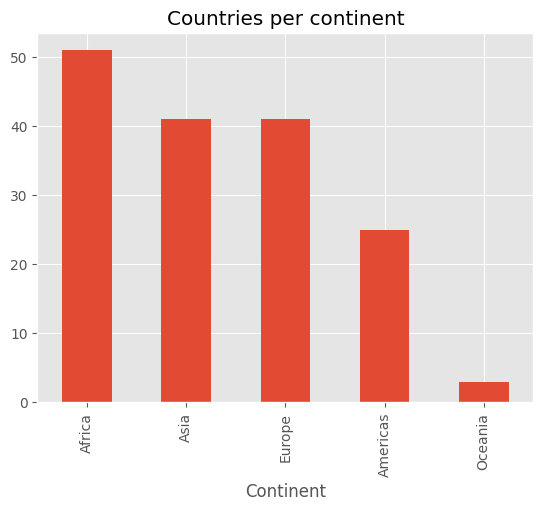

In [24]:
countries_grouped_by_continent = df.groupby("Continent")["Country"]
sorted_values =  countries_grouped_by_continent.nunique().sort_values(ascending=False)

sorted_values.plot.bar(title="Countries per continent");

<h4> Average life expectancy by continent </h4>

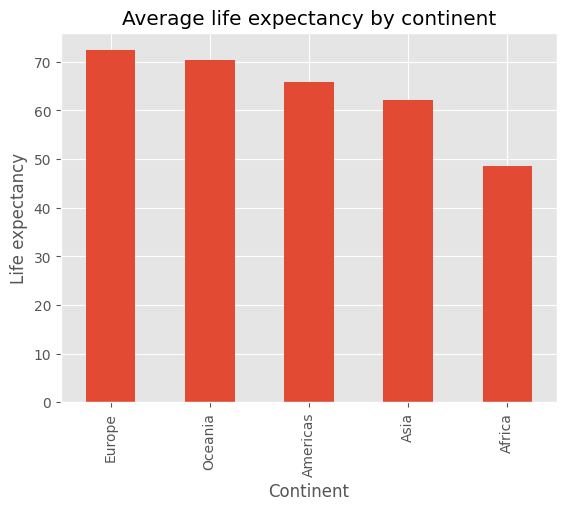

In [25]:
life_exp_grouped_by_continent = df.groupby("Continent")["Life expectancy"]
sorted_values =  life_exp_grouped_by_continent.mean().sort_values(ascending=False)
plt.ylabel("Life expectancy")
sorted_values.plot.bar(title="Average life expectancy by continent");

<h4> Average life expectancy by continent through the years </h4>

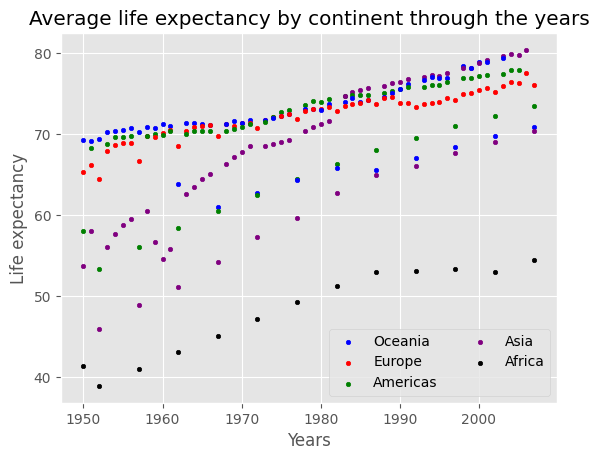

In [26]:
colors_dictionary = {
  "Asia" : "Purple",
  "Europe" : "Red",
  "Africa" : "Black",
  "Americas" : "Green",
  "Oceania" : "Blue"
}

already_labeled = []

for year in years:
  annual_averages = df.loc[df["Year"] == year].groupby("Continent")["Life expectancy"].mean().sort_values(ascending=False)
  continents = annual_averages.keys()
  for continent in continents:
    label = ""
    if continent not in already_labeled:
      label = continent
      already_labeled.append(continent)

    plt.scatter(x = year, y = annual_averages[continent],
    c = colors_dictionary[continent], s = 10, label = label)

plt.xlabel("Years")
plt.ylabel("Life expectancy")
plt.title("Average life expectancy by continent through the years");
plt.legend(loc = "lower right", ncols = 2);

<h4> Average GDP per capta by continent </h4>

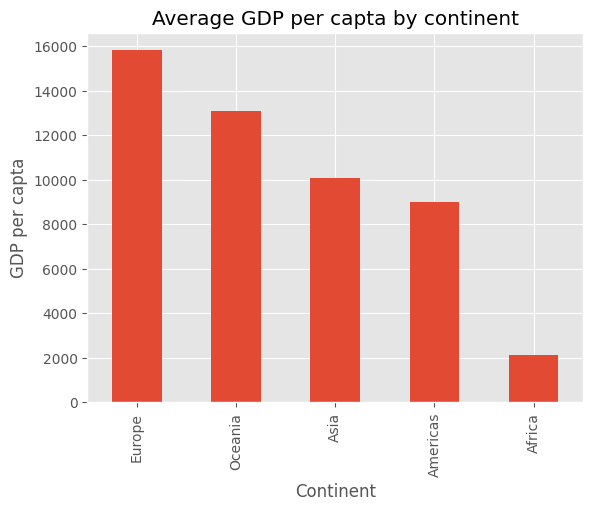

In [27]:
gdp_grouped_by_continent = df.groupby("Continent")["GDP per capta"]
sorted_values =  gdp_grouped_by_continent.mean().sort_values(ascending=False)
plt.ylabel("GDP per capta")
sorted_values.plot.bar(title="Average GDP per capta by continent");

<h4> Average GDP per capta by continent through the years </h4>

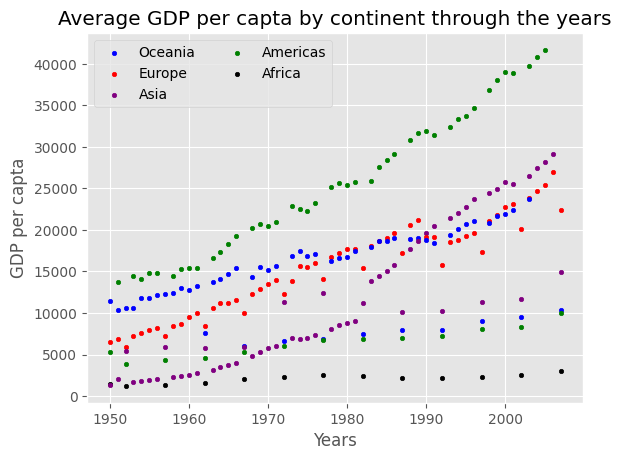

In [28]:
already_labeled = []

for year in years:
  annual_averages = df.loc[df["Year"] == year].groupby("Continent")["GDP per capta"].mean().sort_values(ascending=False)
  continents = annual_averages.keys()
  for continent in continents:
    label = ""
    if continent not in already_labeled:
      label = continent
      already_labeled.append(continent)

    plt.scatter(x = year, y = annual_averages[continent],
    c = colors_dictionary[continent], s = 10, label = label)

plt.xlabel("Years")
plt.ylabel("GDP per capta")
plt.title("Average GDP per capta by continent through the years");
plt.legend(loc = "upper left", ncols = 2);